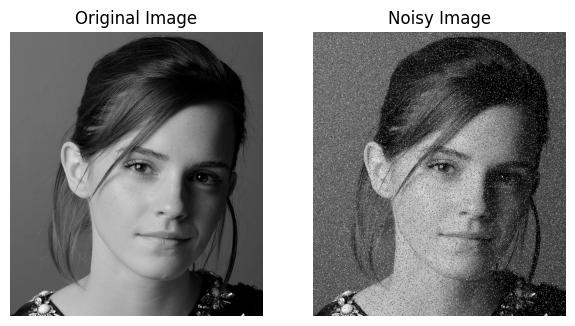

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# add salt-and-pepper noise to an image
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    salt_pixels = int(salt_prob * total_pixels)
    pepper_pixels = int(pepper_prob * total_pixels)

    # Adding salt (white) noise
    coords = [np.random.randint(0, i - 1, salt_pixels) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Adding pepper (black) noise
    coords = [np.random.randint(0, i - 1, pepper_pixels) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

# Function to plot images
def plot_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Load the grayscale image
image = cv2.imread('/content/emma.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise to the image
noisy_image = add_salt_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05)


# Plotting the results, including the original image
plot_images([image, noisy_image],
            ['Original Image', 'Noisy Image',])

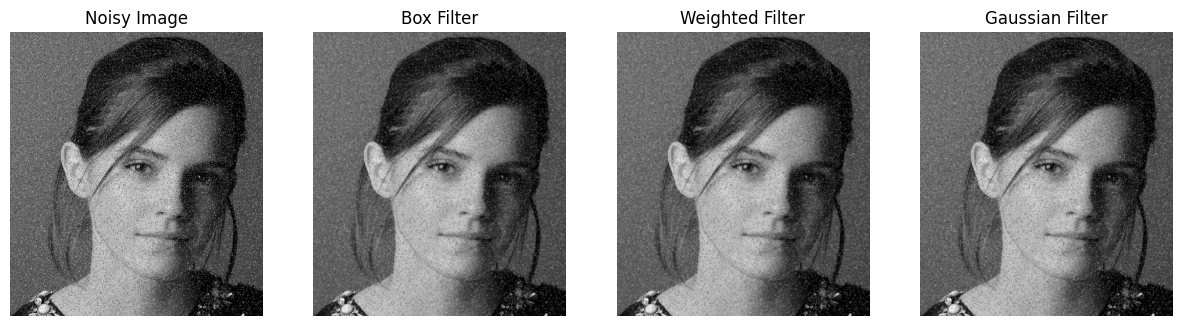

In [16]:
# 1. Linear Filters

# a) Box Filter
box_filter = cv2.blur(noisy_image, (3, 3))  # Using a 3x3 kernel

# b) Weighted Filter (e.g., using a normalized box filter)
weighted_filter = cv2.boxFilter(noisy_image, -1, (3, 3), normalize=True)

# c) Gaussian Filter
gaussian_filter = cv2.GaussianBlur(noisy_image, (3, 3), 0)  # Using a 3x3 kernel and sigma = 0

# Plotting the results, including the original image
plot_images([ noisy_image, box_filter, weighted_filter, gaussian_filter,],
            [ 'Noisy Image', 'Box Filter', 'Weighted Filter', 'Gaussian Filter'])

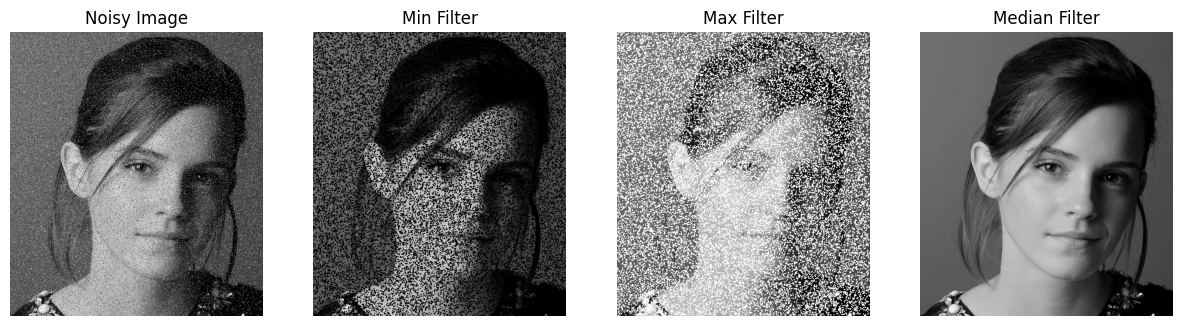

In [17]:
# 2. Non-Linear Filters

# a) Min Filter
min_filter = cv2.erode(noisy_image, np.ones((3, 3), np.uint8))  # Using a 3x3 kernel

# b) Max Filter
max_filter = cv2.dilate(noisy_image, np.ones((3, 3), np.uint8))  # Using a 3x3 kernel

# c) Median Filter
median_filter = cv2.medianBlur(noisy_image, 3)  # Using a 3x3 kernel

plot_images([noisy_image, min_filter, max_filter, median_filter],
            [ 'Noisy Image',
             'Min Filter', 'Max Filter', 'Median Filter'])